In [1]:
x=1

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from matplotlib import pyplot as plt

# DPI = 300
random.seed(123)

In [3]:
neurips_cite = {
    'MultiMIL': 0.740487,
    'totalVI': 0.769846,
    'Seurat WNN': 0.717352,
    'MOFA+': 0.634339,
} 

hao = {
    'MultiMIL': 0.793622,
    'totalVI': 0.77002,
    'Seurat WNN': 0.774986,
    'MOFA+': 0.712043,
}

neurips_multiome = {
    'MultiMIL': 0.740795,
    'multiVI': 0.729342,
    'Seurat WNN': 0.719075,
    'MOFA+': 0.630113,
}

x = {
    'MultiMIL': 0.692508,
    'multiVI': 0.638792,
    'Seurat WNN': 0.687945,
    'MOFA+': 0.680144,
    
}

In [4]:
df = pd.DataFrame([hao, neurips_cite, neurips_multiome, x])
df = df.rename(index={1:'NeurIPS 2021\n (RNA-ADT)', 0: 'Hao 2020\n (RNA-ADT)', 2:'NeurIPS 2021\n (RNA-ATAC)', 3:'10x (RNA-ATAC)'})
df

,MultiMIL,totalVI,Seurat WNN,MOFA+,multiVI
Hao 2020\n (RNA-ADT),0.793622,0.770020,0.774986,0.712043,NaN
NeurIPS 2021\n (RNA-ADT),0.740487,0.769846,0.717352,0.634339,NaN
NeurIPS 2021\n (RNA-ATAC),0.740795,NaN,0.719075,0.630113,0.729342
10x (RNA-ATAC),0.692508,NaN,0.687945,0.680144,0.638792


In [5]:
palette=["black", "#a6dcef", "red", "#00a8cc", "gray"]

In [6]:
colors = {"MultiMIL": "black", "totalVI": "#a6dcef", "Seurat WNN": "red", "MOFA+": "#00a8cc", "multiVI": "gray"}

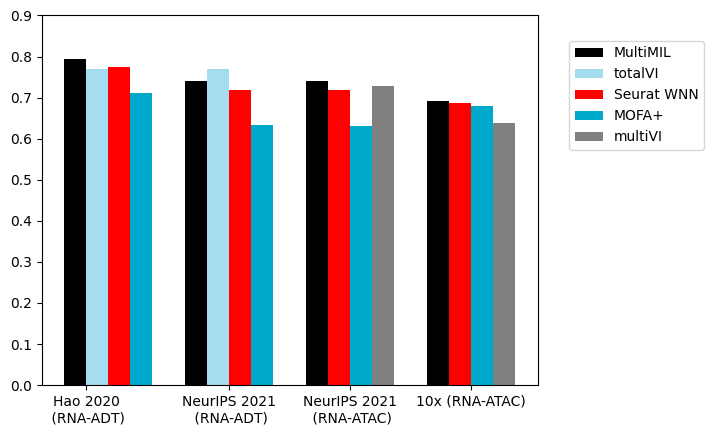

In [7]:
ax = plt.gca()

# width of bars
width = 1

# create emptly lists for x tick positions and names
x_ticks, x_ticks_pos = [], []

# counter for helping with x tick positions
count = 0

# reset the index
# so that we can iterate through the numbers.
# this will help us to get the x tick positions
df = df.reset_index()
# go through each row of the dataframe
for idx, row in df.iterrows():
    # this will be the first bar position for this row
    count += 1
    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    for column in df.drop(["index"], axis=1).columns:
        if row[column] == row[column]:
            plt.bar(count, row[column], color=colors[column], width=width, label=column)
            count += 1
            end_idx += width
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
        x_ticks.append(row["index"])
    count += 0.5

# now set the x_ticks
x_ticks_pos = [1.5, 8, 13.5, 19] # otherwise weird
plt.xticks(x_ticks_pos, x_ticks)
# also plot the legends
# and make sure to not display duplicate labels
# the below code is taken from:
# https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 0.95))
plt.ylim(0, 0.9)
plt.savefig('figures/bar_overall_scib.svg', bbox_inches='tight')

plt.show()